In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Ancho y alto de la pantalla usada:

In [53]:
WIDTH_SCREEN = 1920
HEIGTH_SCREEN = 1080

In [124]:
global_csv_filename = "experimentoDatos/015_gaze_data.csv"
events_csv_filename = "experimentoEventos/015_events_data.csv"
global_heat_map_filename = "heatmap_data_035.csv"

In [125]:
df = pd.read_csv(global_csv_filename)
events_df = pd.read_csv(events_csv_filename)

In [126]:
df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system
0,NaN,NaN,NaN,NaN,NaN,NaN,1729262950170,1.714494e+09
1,NaN,NaN,NaN,NaN,NaN,NaN,1729262966825,1.714494e+09
2,NaN,NaN,NaN,NaN,NaN,NaN,1729262997595,1.714494e+09
3,NaN,NaN,NaN,NaN,NaN,NaN,1729263014250,1.714494e+09
4,NaN,NaN,NaN,NaN,NaN,NaN,1729263048291,1.714494e+09


In [127]:
df.describe()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system
count,9333.000000,9333.000000,9323.000000,9323.000000,9333.000000,9323.000000,9.602000e+03,9.602000e+03
mean,0.707181,0.558314,0.680975,0.600203,5.305171,4.946035,1.729343e+12,1.714494e+09
std,0.178513,0.212584,0.177140,0.209701,0.343432,0.343065,4.616686e+07,4.616682e+01
min,0.076545,-0.044621,0.058523,-0.033088,4.215637,3.764832,1.729263e+12,1.714494e+09
25%,0.722338,0.342415,0.690985,0.386547,5.102921,4.759911,1.729303e+12,1.714494e+09
50%,0.763828,0.661199,0.741028,0.701022,5.316986,4.959793,1.729343e+12,1.714494e+09
75%,0.805154,0.710692,0.776859,0.748135,5.547440,5.187859,1.729383e+12,1.714494e+09
max,1.044347,1.750156,0.968085,1.798989,6.090149,5.705383,1.729423e+12,1.714494e+09


**df.describe()**: statistical summary of the DataFrame: count, meanm standard deviation, minimum and maximum values for each column. 

### **LIMPIEZA DE DATOS**

 **·  Filas con valores NaN:** eliminamos la fila

In [128]:
not_Nan_df = df.dropna()

In [129]:
not_Nan_df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system
23,0.753603,0.516366,0.758187,0.581643,5.560959,5.092224,1729263364730,1.714494e+09
24,0.749364,0.503212,0.741705,0.538952,5.548691,5.093353,1729263381385,1.714494e+09
25,0.746746,0.484675,0.727462,0.508598,5.535873,5.072266,1729263398039,1.714494e+09
26,0.751656,0.489290,0.725893,0.510996,5.522659,5.067719,1729263414694,1.714494e+09
27,0.752096,0.489841,0.726551,0.512239,5.523743,5.064957,1729263431349,1.714494e+09


### EXTRACCIÓN DATOS PARA INPUT DEL GENERADOR DE MAPAS DE CALOR

Me genero un archivo solo con x e y de un ojo para probar el heat map generator

Como los valores de Left Eye X y Left Eye Y vienen en proporción a la anchura y altura de la pantalla, es decir, 0.5 significa que se mira a la mitad de la pantalla, multiplico los datos de ambos para que queden en números enteros, que es lo que admite el programa de generar mapas de calor.

In [25]:
df_heatmap = pd.DataFrame()

df_heatmap['X'] = ((not_Nan_df['Left Eye X'] + not_Nan_df['Right Eye X']) / 2 * WIDTH_SCREEN).astype(int)
df_heatmap['Y'] = ((not_Nan_df['Left Eye Y'] + not_Nan_df['Right Eye Y']) / 2 * HEIGTH_SCREEN).astype(int)

df_heatmap['X'] = df_heatmap['X'].round(0)
df_heatmap['Y'] = df_heatmap['Y'].round(0)

df_heatmap.to_csv(global_heat_map_filename, index=False, header=False)

<Axes: >

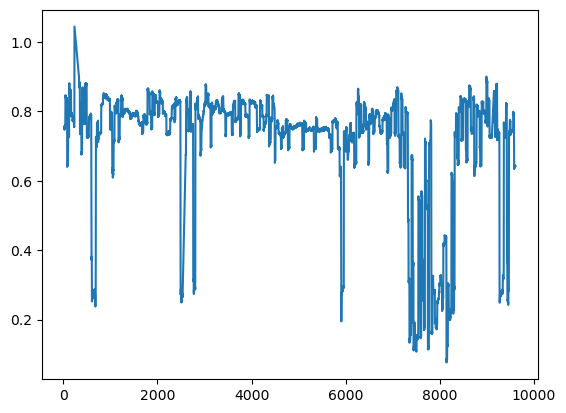

In [26]:
not_Nan_df['Left Eye X'].plot()

**· Filas con valores Nan:** Sustituir por la media de la columna

In [10]:
mean_left_eye_x = df["Left Eye X"].mean()
df["Left Eye X"].fillna(mean_left_eye_x, inplace = True)
df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
0,0.348995,0.548616,0.350375,0.552178,4.789185,4.728241,229888379,1472534456,Evento 0
1,0.347021,0.548693,0.349942,0.547541,4.796143,4.734863,229905034,1472551121,Evento 0
2,0.347330,0.549302,0.351262,0.547419,4.794785,4.733337,229921689,1472567792,Evento 0
3,0.347693,0.543544,0.350297,0.550931,4.804962,4.737762,229938344,1472584465,Evento 0
4,0.348173,0.542777,0.352406,0.545402,4.820709,4.734085,229954998,1472601127,Evento 0


## GRÁFICAS

#### Gráficas sacadas a partir de la colección de datos originales (sin quitar Nan o sustituir por nada)

Posición X ojo izquierdo

<Axes: >

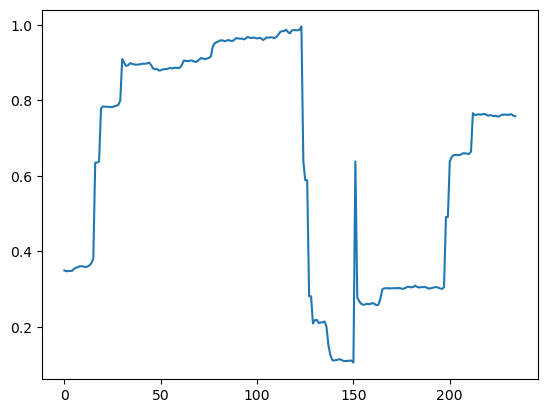

In [11]:
df['Left Eye X'].plot()

Posición Y ojo izquierdo

<Axes: >

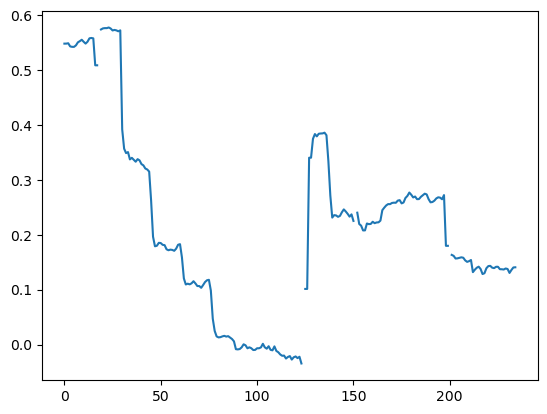

In [12]:
df['Left Eye Y'].plot()

Posición X ojo derecho

<Axes: >

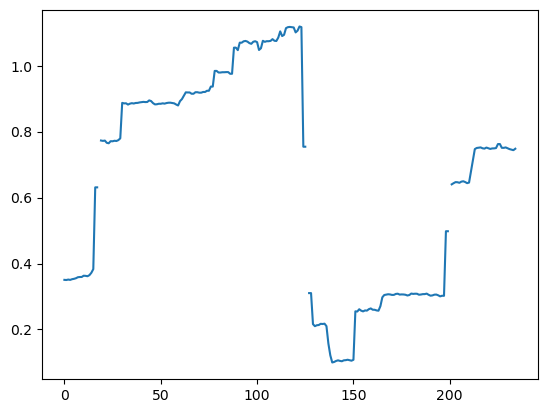

In [13]:
df['Right Eye X'].plot()

Posición Y ojo derecho

Si probamos a hacer el plot sin especificar decimal como comas, vemos que nos da error al no reconocer los datos como numéricos.

<Axes: >

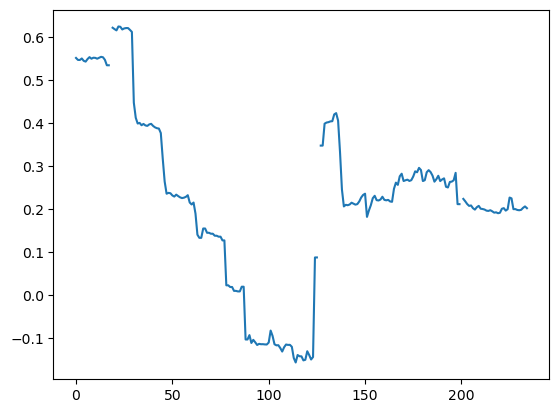

In [14]:
df['Right Eye Y'].plot()

Comparación posición X de ojo derecho y ojo izquierdo

<Axes: xlabel='Left Eye X', ylabel='Right Eye X'>

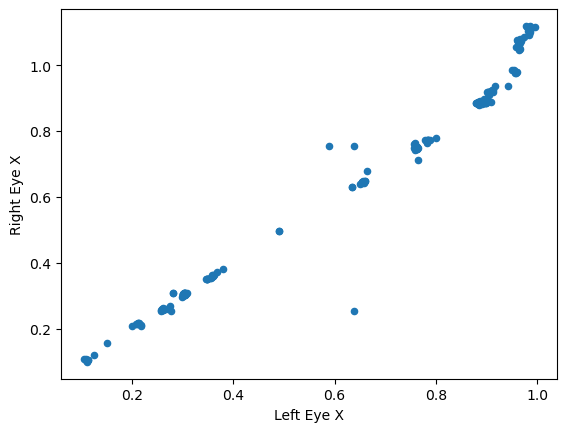

In [15]:
df.plot.scatter(x='Left Eye X', y='Right Eye X')

Comparación posición Y de ojo derecho y ojo izquierdo

<Axes: xlabel='Left Eye Y', ylabel='Right Eye Y'>

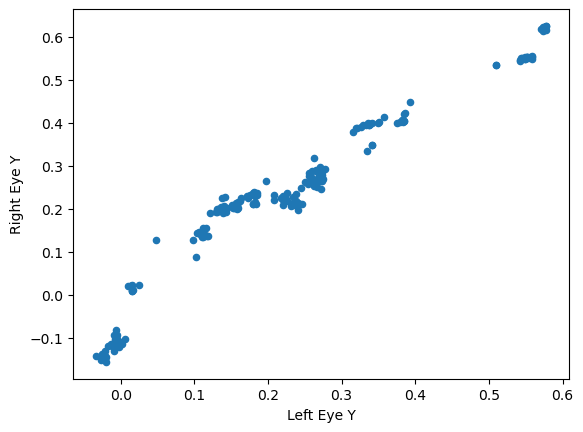

In [16]:
df.plot.scatter(x='Left Eye Y', y='Right Eye Y')

Comparación tamaño pupilas ojo derecho y ojo izquierdo

<Axes: xlabel='Pupil right eye', ylabel='Pupil left eye'>

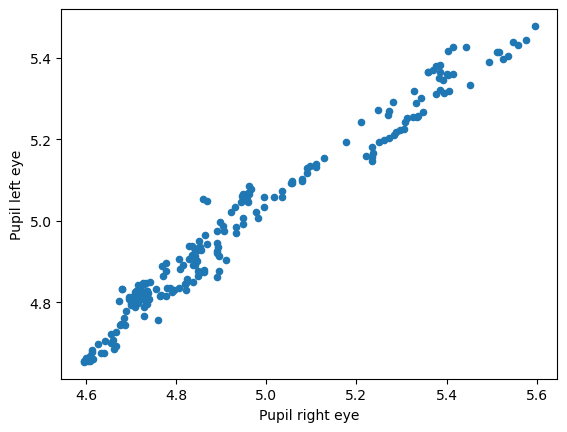

In [17]:
df.plot.scatter(x='Pupil right eye', y='Pupil left eye')

Tamaño de la pupila izquierda

<Axes: >

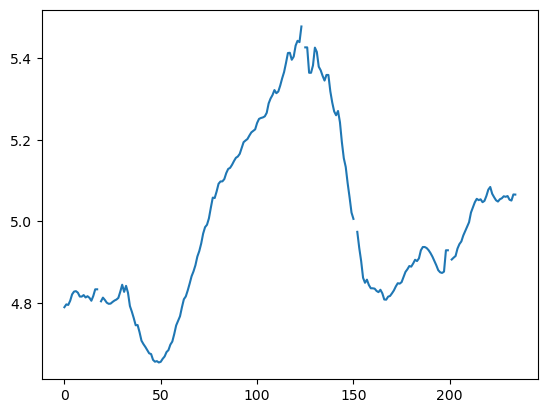

In [18]:
df['Pupil left eye'].plot()

Tamaño de la pupila derecha

<Axes: >

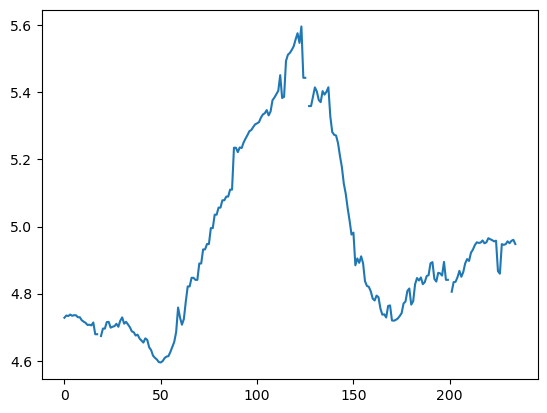

In [19]:
df['Pupil right eye'].plot()

### Gráficas sacadas por Eventos

Gráfica de la posicion X del ojo izquierdo pero solo para el Evento 0

<Axes: >

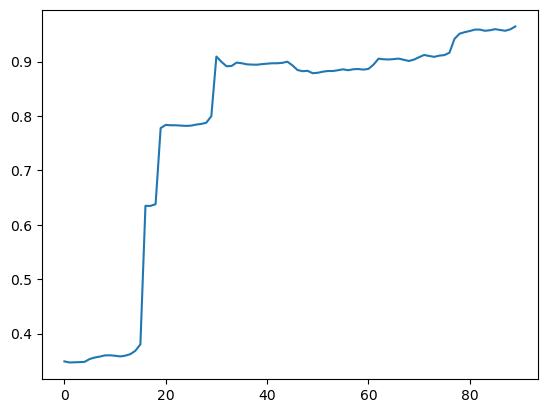

In [20]:
event_0 = df['Event'] == 'Evento 0'
left_eye_x_event_0 = df[event_0]['Left Eye X']
left_eye_x_event_0.plot()

<Axes: >

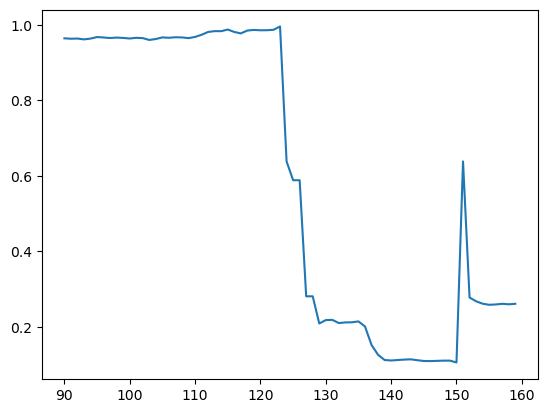

In [21]:
event_1 = df['Event'] == 'Evento 1'
left_eye_x_event_1 = df[event_1]['Left Eye X']
left_eye_x_event_1.plot()

### Comparativas de gráficas realizadas de formas diferentes

Eliminar valores Nan **vs** Rellenar huecos de esos valores para obtener gráfica continua

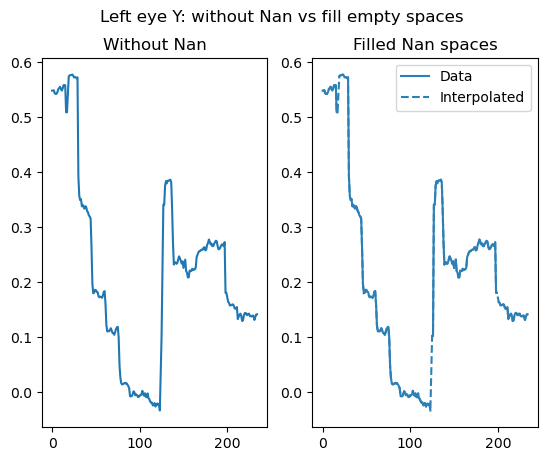

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Left eye Y: without Nan vs fill empty spaces')

ax1.plot(not_Nan_df['Left Eye Y'])
ax1.set_title('Without Nan')

filled_Nan_df = df['Left Eye Y'].interpolate()
ax2.plot(df.index, df['Left Eye Y'], label='Data', color='#2d80b6')
ax2.plot(df.index, filled_Nan_df, label='Interpolated', linestyle='--', color='#2d80b6')
ax2.set_title('Filled Nan spaces')

ax2.legend()

In [58]:
print(df.columns)

Index(['Left Eye X', 'Left Eye Y', 'Right Eye X', 'Right Eye Y',
       'Pupil left eye', 'Pupil right eye', 'Timestamp device',
       'Timestamp system'],
      dtype='object')


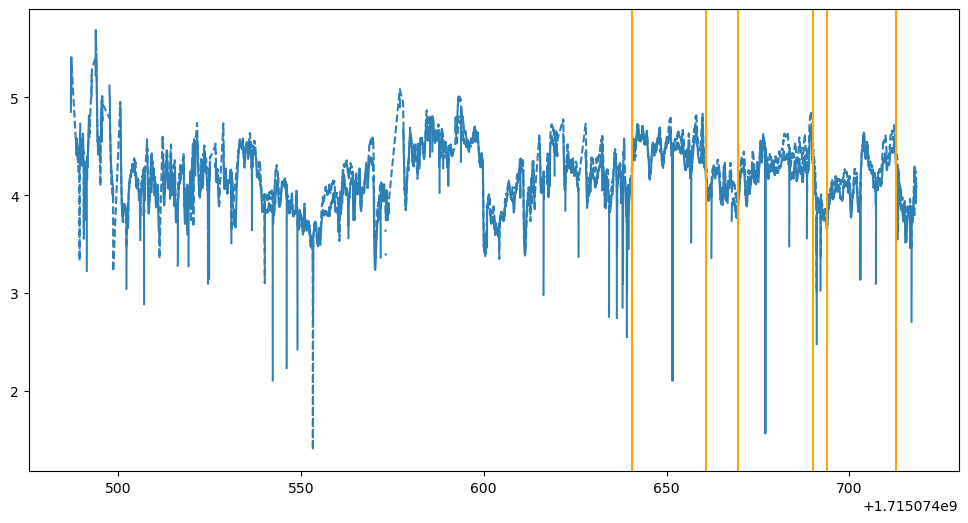

In [73]:
# fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la figura

# # Graficar usando la columna "Timestamp system" como eje x
# filled_Nan_df = df['Pupil left eye'].interpolate()
# ax.plot(df['Timestamp system'], df['Pupil right eye'], color='#2d80b6')
# ax.plot(df['Timestamp system'], filled_Nan_df, linestyle='--', color='#2d80b6')

# # Añadir líneas verticales para los eventos
# for event_time in timestamps_events:
#     ax.axvline(x=event_time, color='orange', linestyle='-')

# # Mostrar la gráfica
# plt.show()

In [130]:
timestamps_events = []

#events_df['Timestamp'] = pd.to_datetime(events_df['Timestamp'])

event1_begin = events_df.loc[events_df['Evento'] == "Evento '1'", 'Timestamp']
event1_end = events_df.loc[events_df['Evento'] == "Evento '2'", 'Timestamp']
event2_begin = events_df.loc[events_df['Evento'] == "Evento '3'", 'Timestamp']
event2_end = events_df.loc[events_df['Evento'] == "Evento '4'", 'Timestamp']
event3_begin = events_df.loc[events_df['Evento'] == "Evento '5'", 'Timestamp']
event3_end = events_df.loc[events_df['Evento'] == "Evento '6'", 'Timestamp']

timestamps_events.append(event1_begin.values[0])
timestamps_events.append(event1_end.values[0])
timestamps_events.append(event2_begin.values[0])
timestamps_events.append(event2_end.values[0])
timestamps_events.append(event3_begin.values[0])
timestamps_events.append(event3_end.values[0])

timestamps_events = np.array(timestamps_events, dtype=float)

print(timestamps_events)


[1.71449358e+09 1.71449361e+09 1.71449362e+09 1.71449367e+09
 1.71449367e+09 1.71449372e+09]


In [131]:
events_df['Timestamp'] = pd.to_numeric(events_df['Timestamp'], errors='coerce')

event1_begin = events_df.loc[events_df['Evento'] == "Evento '1'", 'Timestamp'].values[0]
event1_end = events_df.loc[events_df['Evento'] == "Evento '2'", 'Timestamp'].values[0]
event2_begin = events_df.loc[events_df['Evento'] == "Evento '3'", 'Timestamp'].values[0]
event2_end = events_df.loc[events_df['Evento'] == "Evento '4'", 'Timestamp'].values[0]
event3_begin = events_df.loc[events_df['Evento'] == "Evento '5'", 'Timestamp'].values[0]
event3_end = events_df.loc[events_df['Evento'] == "Evento '6'", 'Timestamp'].values[0]

timestamps_events = [event1_begin,event1_end, event2_begin, event2_end, event3_begin,event3_end]

In [132]:
# fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la figura

# # Graficar usando la columna "Timestamp system" como eje x
# filled_Nan_df = df['Pupil right eye'].interpolate()
# ax.plot(df['Timestamp system'], df['Pupil right eye'], color='#2d80b6')
# ax.plot(df['Timestamp system'], filled_Nan_df, linestyle='--', color='#2d80b6')

# # Añadir líneas verticales para los eventos
# for event_time in timestamps_events:
#     ax.axvline(x=event_time, color='orange', linestyle='-')

# # Mostrar la gráfica
# plt.show()

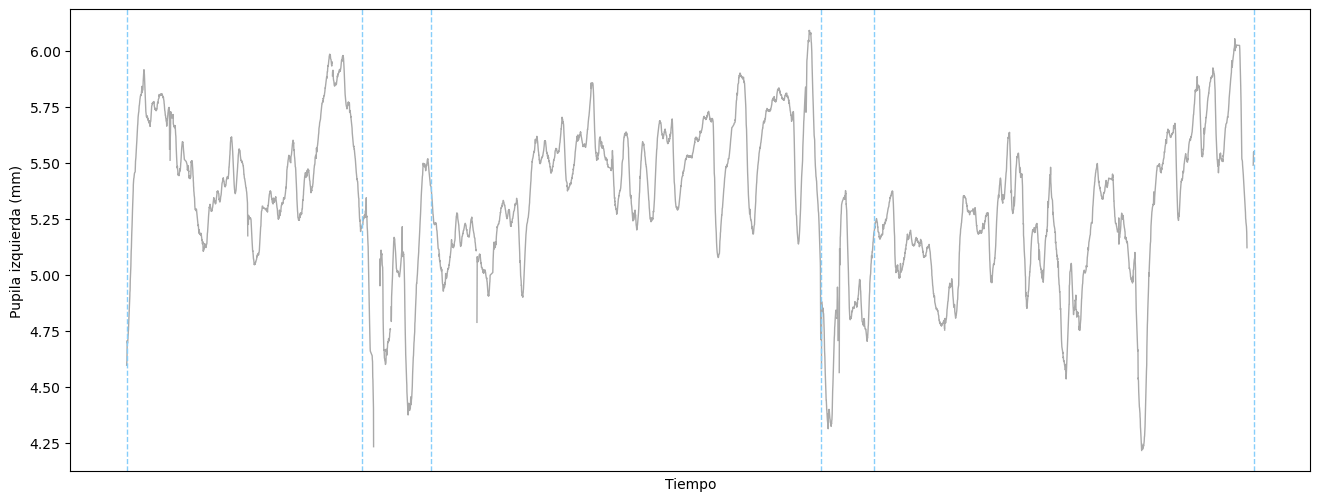

In [133]:
fig, ax = plt.subplots(figsize=(16, 6))  # Ajusta el tamaño de la figura

# Filtrar datos de df para el rango de tiempos de event1_begin a event3_end
df_filtered = df[(df['Timestamp system'] >= event1_begin) & (df['Timestamp system'] <= event3_end)]

# Graficar usando la columna "Timestamp system" como eje x
filled_Nan_df = df_filtered['Pupil left eye'].interpolate()
ax.plot(df_filtered['Timestamp system'], df_filtered['Pupil left eye'], color='#A9A9A9', linewidth=1.0)
#ax.plot(df_filtered['Timestamp system'], filled_Nan_df, linestyle='--', color='#A9A9A9', linewidth=1.0)

# Añadir líneas verticales para los eventos
for event_time in timestamps_events:
    ax.axvline(x=event_time, color='#87CEFA', linestyle='--', linewidth=1.0)

ax.xaxis.set_ticks([])

ax.set_xlabel('Tiempo')
ax.set_ylabel('Pupila izquierda (mm)')
    
plt.savefig('pupils/left_015.png')

# Mostrar la gráfica
plt.show()

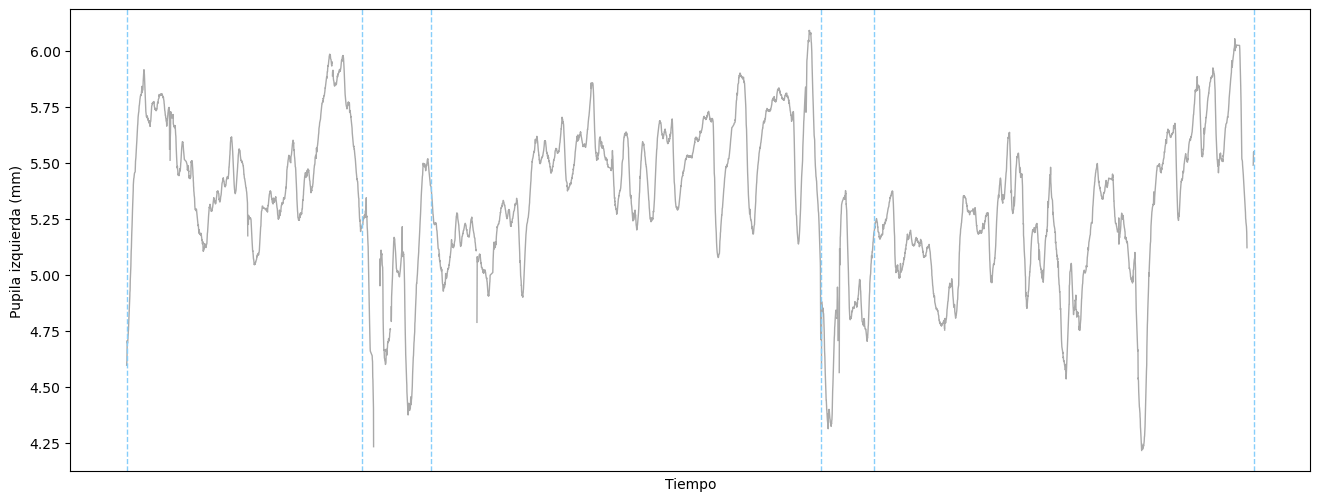

In [134]:
fig, ax = plt.subplots(figsize=(16, 6))  # Ajusta el tamaño de la figura

# Filtrar datos de df para el rango de tiempos de event1_begin a event3_end
df_filtered = df[(df['Timestamp system'] >= event1_begin) & (df['Timestamp system'] <= event3_end)]

# Graficar usando la columna "Timestamp system" como eje x
filled_Nan_df = df_filtered['Pupil right eye'].interpolate()
ax.plot(df_filtered['Timestamp system'], df_filtered['Pupil left eye'], color='#A9A9A9', linewidth=1.0)
#ax.plot(df_filtered['Timestamp system'], filled_Nan_df, linestyle='--', color='#A9A9A9', linewidth=1.0)

# Añadir líneas verticales para los eventos
for event_time in timestamps_events:
    ax.axvline(x=event_time, color='#87CEFA', linestyle='--', linewidth=1.0)

ax.xaxis.set_ticks([])

ax.set_xlabel('Tiempo')
ax.set_ylabel('Pupila izquierda (mm)')
    
plt.savefig('pupils/right_015.png')

# Mostrar la gráf